In [ ]:
from glob import glob

# Load Dataset


In [ ]:
path='/content/drive/MyDrive/excercise dataset'
image=glob(path+'/*')
image

['/content/drive/MyDrive/excercise dataset/squats',
 '/content/drive/MyDrive/excercise dataset/side planks',
 '/content/drive/MyDrive/excercise dataset/push up',
 '/content/drive/MyDrive/excercise dataset/skipping']

# Access each file 


In [ ]:
squats_list=list(glob(path+'/squats/*'))[:600]
planks_list=list(glob(path+'/side planks/*'))[:600]
pushup_list=list(glob(path+'/push up/*'))[:600]
skipping_list=list(glob(path+'/skipping/*'))[:600]


# Check datas length

In [ ]:
print(len(squats_list))
print(len(planks_list))
print(len(pushup_list))
print(len(skipping_list))

600
600
600
600


In [ ]:
input_map={'squats':squats_list,'side planks':planks_list,'push up':pushup_list,'skipping':skipping_list}
output_map={'squats':0,'side planks':1,'push up':2,'skipping':3}

In [ ]:
x=[]
y=[]


In [ ]:
import cv2
import numpy as np


In [ ]:
for img in input_map:
  path_list=input_map[img]
  #print(path_list)
  for path in path_list:
    img_array=cv2.imread(path)
    #print(img_array)
    img_array_resize=cv2.resize(img_array,(224,224))
    img_array_resize=img_array_resize/255
    img_array_resize=img_array_resize.reshape(224,224,3,1)
    x.append(img_array_resize)
    y.append(output_map[img])
    

In [ ]:
x_=np.array(x)

In [ ]:
y_=np.array(y)

In [ ]:
x_.shape

(1600, 224, 224, 3, 1)

In [ ]:
y_.shape

(1600,)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_,y_,test_size=0.2)

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Conv3D,MaxPool3D,BatchNormalization,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [ ]:
model=Sequential()
model.add(Conv3D(filters=32,kernel_size=(2,2,3),input_shape=(224,224,3,1)))
model.add(MaxPool3D(pool_size=(2,2,1)))
model.add(BatchNormalization())
model.add(Conv3D(filters=20,kernel_size=(2,2,1),activation='relu'))
model.add(MaxPool3D(pool_size=(2,2,1)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4,activation='softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 223, 223, 1, 32)   416       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 111, 111, 1, 32)  0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 1, 32)  128       
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 110, 110, 1, 20)   2580      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 55, 55, 1, 20)    0         
 3D)                                                             
                                                        

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])


In [ ]:
h=model.fit(xtrain,ytrain,batch_size=200,epochs=5,validation_data=(xtest,ytest))


Epoch 1/5
7/7 [==============================] - 20s 1s/step - loss: 0.8704 - accuracy: 0.8906 - val_loss: 13.7519 - val_accuracy: 0.2438
Epoch 2/5
7/7 [==============================] - 4s 632ms/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 8.2793 - val_accuracy: 0.4625
Epoch 3/5
7/7 [==============================] - 4s 590ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 7.5528 - val_accuracy: 0.3906
Epoch 4/5
7/7 [==============================] - 4s 598ms/step - loss: 9.3132e-11 - accuracy: 1.0000 - val_loss: 5.8086 - val_accuracy: 0.3906
Epoch 5/5
7/7 [==============================] - 4s 573ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.1832 - val_accuracy: 0.3875


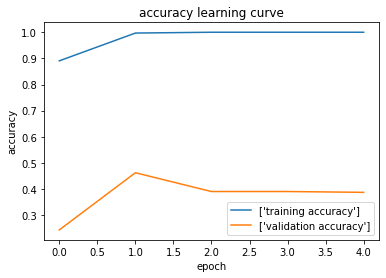

In [ ]:
import matplotlib.pyplot as plt
train_acc=h.history['accuracy']
val_acc=h.history['val_accuracy']
epoch=h.epoch

plt.plot(epoch,train_acc,label=['training accuracy'])
plt.plot(epoch,val_acc,label=['validation accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy learning curve')
plt.legend()

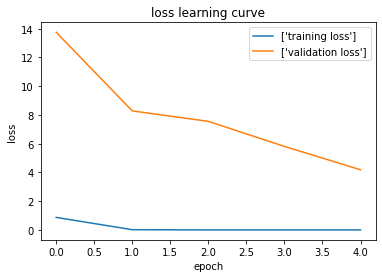

In [ ]:
train_loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=h.epoch

plt.plot(epoch,train_loss,label=['training loss'])
plt.plot(epoch,val_loss,label=['validation loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss learning curve')
plt.legend()

In [ ]:
from PIL import Image


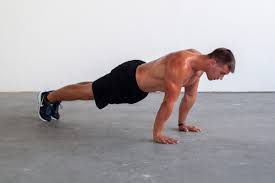

In [ ]:
Image.open('/content/drive/MyDrive/excercise dataset/push up/images - Copy (10) - Copy - Copy - Copy.jpg')

In [ ]:
i_array=cv2.imread('/content/drive/MyDrive/excercise dataset/push up/images - Copy (10) - Copy - Copy - Copy.jpg')
dataset=[]
i_array=cv2.resize(i_array,(224,224))
#i_array.shape
np.max(i_array)
i_array=i_array/255
i_array=i_array.reshape(224,224,3,1)
dataset.append(i_array)
test=np.array(dataset)
test.shape
result=model.predict(test)
np.argmax(result)

2

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save('exercise_model.h5')
